# Random Graph

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
model_code_dir = os.path.join(parent_dir, 'src')
if model_code_dir not in sys.path:
    sys.path.append(model_code_dir)

import exp_env as env
import pickle
import copy

In [2]:
# Define the path to the gpickle file
input_file = '../network_data/g_er_dir.gpickle'

# Load the graph from the gpickle file
try:
    with open(input_file, 'rb') as f:
        G = pickle.load(f)
    print("Graph loaded successfully")
except Exception as e:
    print(f"Error loading graph: {e}")

# Verify the loaded graph
print(G)

# Be sure to check that the import file is aligned with parameters below
graph_type = "erdos_renyi_graph"
influencers_cascade_steps = 2
num_influencers = 30
num_nodes = 2000
k_deinfluencers_ls = list(range(1, 30, 2))
general_cascade_steps = 3
num_avg_runs = 2

# Alternatively, generate the graph without loading it
# G = nx.erdos_renyi_graph(num_nodes, 0.01, directed=True)
# print(f"Generated graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph loaded successfully
DiGraph with 2000 nodes and 4000 edges


In [3]:
model = env.run_influence_cascade(G, num_influencers=num_influencers, steps=influencers_cascade_steps, selection_method='random')
num_edges = G.number_of_edges()

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 53
Number of deinfluenced nodes: 0
Number of susceptible nodes: 1947
influencer {1800, 1420, 396, 1805, 15, 400, 914, 1179, 1820, 543, 1825, 1187, 1059, 1957, 932, 40, 1078, 453, 710, 74, 1869, 717, 1232, 1752, 1246, 1384, 1771, 1267, 1142, 375}


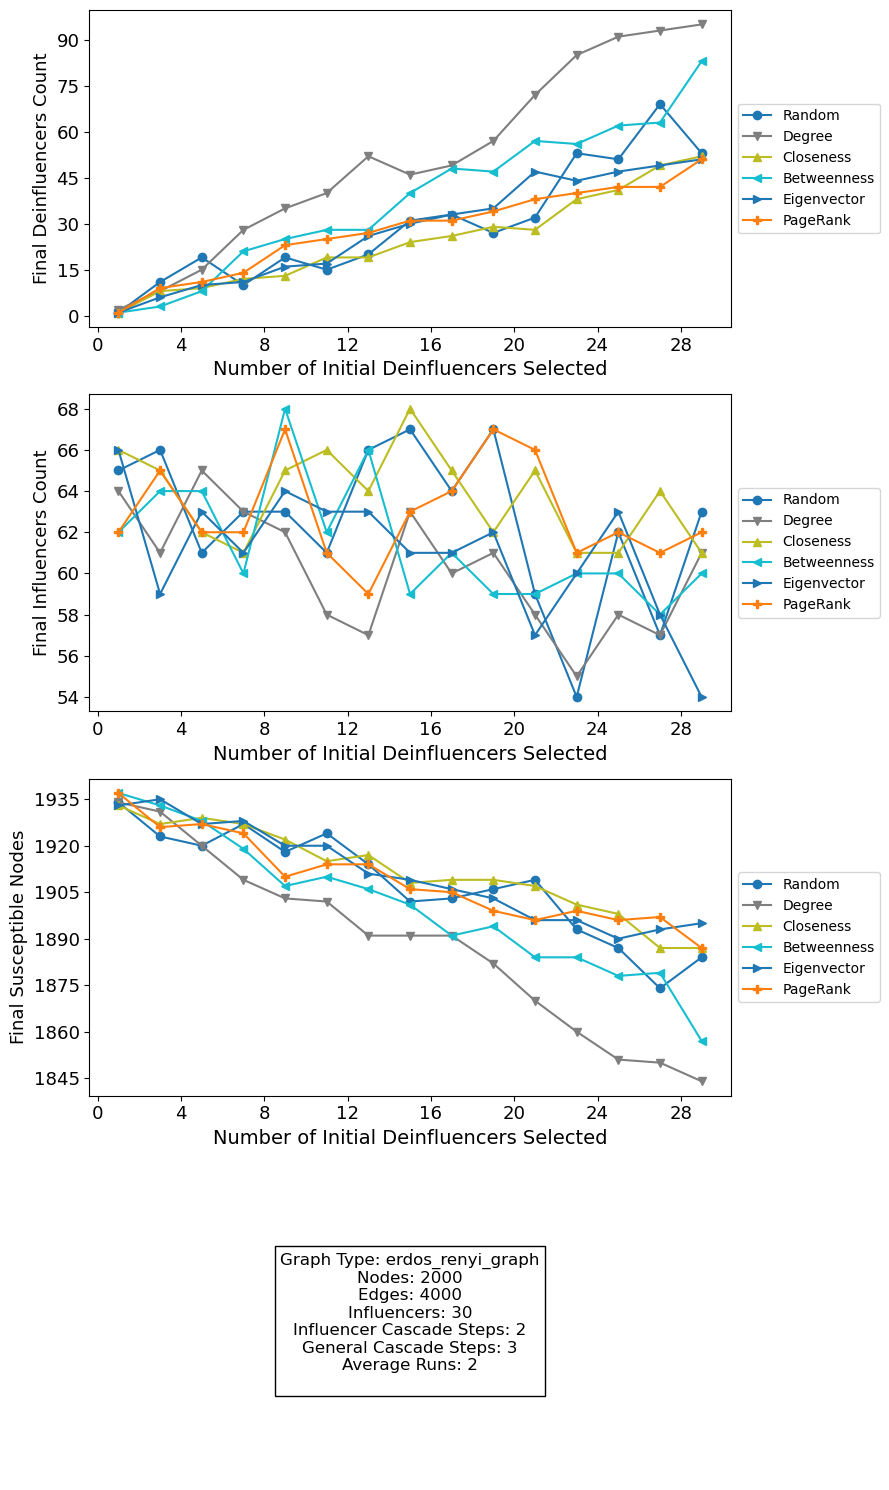

In [4]:
deinfluencers_list = env.select_deinfluencers_cen(k_deinfluencers_ls, model_fixed_influencers)
results = env.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)
env.plot_deinfluencer_results_new(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)

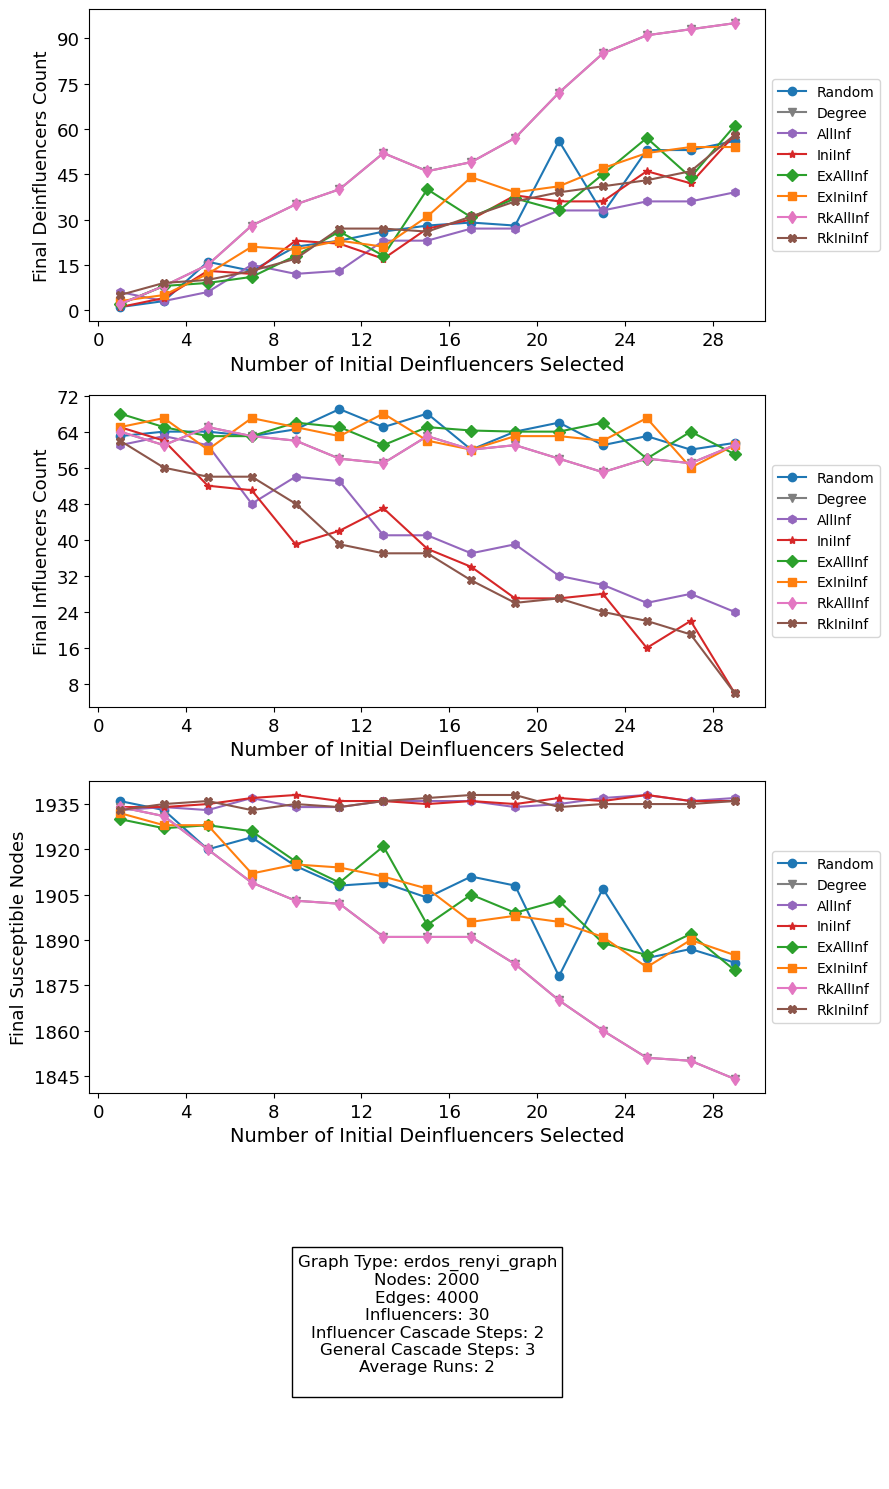

In [5]:
deinfluencers_list = env.select_deinfluencers_cri(k_deinfluencers_ls, model_fixed_influencers)
results = env.average_results(deinfluencers_list, model_fixed_influencers, num_runs=num_avg_runs, steps=general_cascade_steps)
env.plot_deinfluencer_results_new(results, G, graph_type, num_nodes, num_edges, num_influencers, influencers_cascade_steps, general_cascade_steps, num_avg_runs)